<ipython-input-1-bc4244e12f4e>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


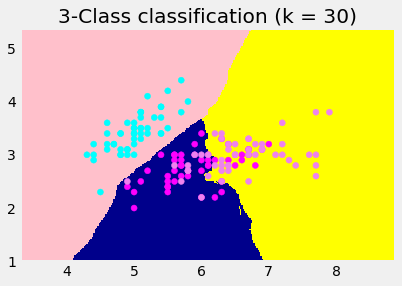

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.88      0.94        33
           2       0.85      1.00      0.92        22

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.95        90
weighted avg       0.96      0.96      0.96        90

[[35  0  0]
 [ 0 29  4]
 [ 0  0 22]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 30
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
# import some data to play with
iris = datasets.load_iris()

# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02

# Create color maps
cmap_light = ListedColormap(['pink', 'darkblue','yellow'])
cmap_bold = ListedColormap(['cyan', 'magenta','violet'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.style.use('fivethirtyeight')
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
  
# Loading data 
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.6, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10) 
    
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=5,
                     weights='uniform')
knn_prediction=knn.predict(X_test)
print(accuracy_score(knn_prediction,y_test))
print(classification_report(knn_prediction,y_test))
print(confusion_matrix(knn_prediction,y_test))

In [3]:
import pandas as pd
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris=load_iris()
X = iris.data
y = iris.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.6, random_state=100)
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=9)
clf_entropy.fit(X_train, y_train) 
y_pred_en=clf_entropy.predict(X_test)
y_pred_en
print(y_pred_en)
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text 
from sklearn.model_selection import train_test_split 
iris = load_iris() 
X = iris.data
y = iris.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.3, random_state=100)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
feature_cols=['State','Cured','Death','Positive','Negative']
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=6)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r) 

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0 0 0 0 1 0 0 0 1 2 2 1 2 1 2 2 1 0 2 2 1 0 0 2 0 0 0 1 2 2
 1 0 2 2 0 1 1 2 0 1 1 2 1 1 1 2]
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--

[Text(150.33599999999998, 209.952, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(112.75199999999998, 163.296, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(187.92, 163.296, 'X[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(75.16799999999999, 116.64, 'X[2] <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(37.583999999999996, 69.98400000000001, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(112.75199999999998, 69.98400000000001, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(75.16799999999999, 23.328000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(150.33599999999998, 23.328000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.67199999999997, 116.64, 'X[2] <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(263.08799999999997, 69.98400000000001, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(225.50399999999996, 23.32800

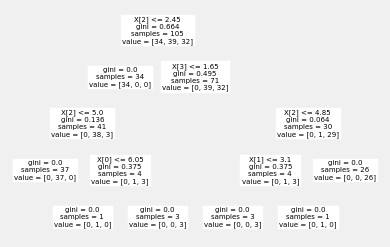

In [4]:
import pandas as pd
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
iris=load_iris()
X = iris.data
y = iris.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.3, random_state=100)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
tree.plot_tree(clf) 

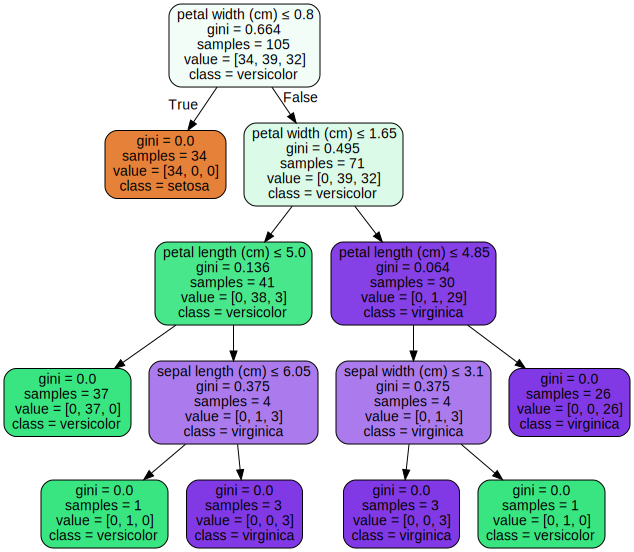

In [5]:
import pandas as pd
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
import graphviz 
iris=load_iris()
X = iris.data
y = iris.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.3, random_state=100)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train) 
dot_data = tree.export_graphviz(clf,out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris.dot") 
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

total number of data 7086
70% of training data 60
30% of testing data 90
predicted output [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 1 0 0 0 1 0 1 2 0 1 1 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 2]
actual output [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1]
[[35  0  0]
 [ 0 28  1]
 [ 0  4 22]]
Accuracy0.9444444444444444
KMeans and KNN performance metrics
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        35
     class 1       0.88      0.97      0.92        29
     class 2       0.96      0.85      0.90        26

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

accuracy: 0.9444444444444444


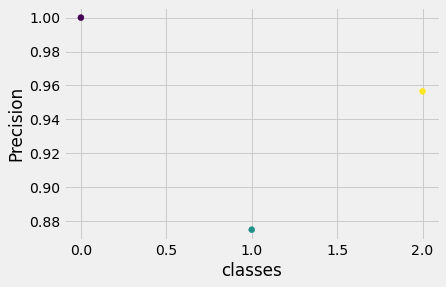

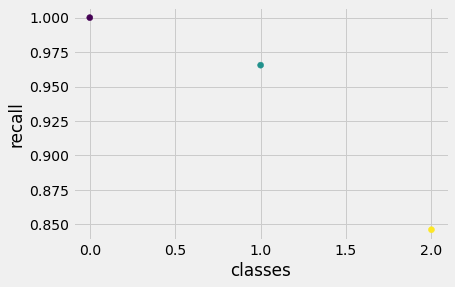

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from pylab import scatter,show,plot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import itertools
import math
import csv
from sklearn import preprocessing
from pandas.plotting import parallel_coordinates
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import precision_score,recall_score,accuracy_score
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn.datasets import load_iris
# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target
n_clusters=4
k_means = KMeans(n_clusters=9, random_state=0) 
neigh=KNeighborsClassifier(n_neighbors=int(math.sqrt(n_clusters)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
print('total number of data',len(train))
print('70% of training data',len(X_train))
print('30% of testing data',len(X_test))
print('predicted output',neigh.predict(X_test))
print('actual output',y_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

print('Accuracy'+str(accuracy_score(y_test,y_pred)))
target_names=['class 0','class 1','class 2']
graph_cl=[0,1,2]
print('KMeans and KNN performance metrics')
print(classification_report(y_test,y_pred,target_names=target_names))
precision=precision_score(y_test,y_pred,average=None)
recall=recall_score(y_test,y_pred,average=None)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
plt.scatter(graph_cl,precision,c=graph_cl)
plt.xlabel("classes")
plt.ylabel("Precision")
plt.show()
plt.scatter(graph_cl,recall,c=graph_cl)
plt.xlabel("classes")
plt.ylabel("recall")
plt.show()        
    

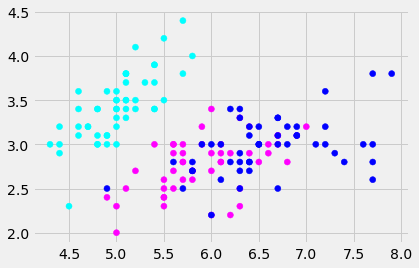

In [9]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from pylab import *
from sklearn.datasets import load_iris
Cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='outletsales')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
train=train.iloc[:,3:5].values
Cluster.fit(X_train,y_train)
cmap_bold = ListedColormap(['cyan', 'magenta','blue'])
plt.style.use('fivethirtyeight')
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.linear_model
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
  
# Loading data 
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)
lr=LinearRegression(normalize=True)  
lr.fit(X_train,y_train)
LinearRegression(copy_X=True,n_jobs=None,normalize=True)
lr_accuracy=round(lr.score(X_train,y_train)*100,2)
print(lr_accuracy)



92.54


In [12]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import pandas as pd
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn.datasets import load_iris
irisData =load_iris()
X = irisData.data
y = irisData.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=5)
training_samples=int(0.6*len(X_train))
testing_samples=len(X_train)-1
X_train,y_train=X[:training_samples],y[:training_samples]
X_test,y_test=X[training_samples:],y[training_samples:]
reg_linear=linear_model.LinearRegression()
reg_linear.fit(X_train,y_train)
y_test_pred=reg_linear.predict(X_test)
print("Regressor model performance:")
print("Mean Absolute Error=",round(sm.mean_absolute_error(y_test,y_test_pred),2))
print("Mean Squared Error=",round(sm.mean_squared_error(y_test,y_test_pred),2))
print("Median Absolute Error=",round(sm.median_absolute_error(y_test,y_test_pred),2))
print("R2 score=",round(sm.r2_score(y_test,y_test_pred),2))
print('AUC-ROC:',round(sm.roc_auc_score(y_test,y_test_pred),2))
print('LOGLOSS:',round(sm.log_loss(y_test,y_test_pred),2))


Regressor model performance:
Mean Absolute Error= 0.43
Mean Squared Error= 0.25
Median Absolute Error= 0.51
R2 score= -0.1
AUC-ROC: 0.99
LOGLOSS: 5.82


In [13]:
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import math
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import pandas as pd
train=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\covid_19_india.csv')
test=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\Datasets\StatewiseTestingDetails.csv')
from sklearn.datasets import load_iris
irisData =load_iris()
X = irisData.data
y = irisData.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.3, random_state=100)
training_samples=int(0.6*len(X_train))
testing_samples=len(X_train)-1
X_train,y_train=X[:training_samples],y[:training_samples]
X_test,y_test=X[training_samples:],y[training_samples:]
regressor_multi=LinearRegression()
regressor_multi.fit(X_train,y_train)
y_pred=regressor_multi.predict(X_test)
accuracy=cross_val_score(estimator=regressor_multi,X=X_train,y=y_train,cv=10)
print(f"The accuracy of MultiLinear Regression model is \t {accuracy.mean()}")
print(f"The deviation in accuracy is \t {accuracy.std()}")
mse=mean_squared_error(y_test,y_pred)
print("mean squared error is:",mse)
print("root mean squared error is:",math.sqrt(mse))
regressor_random=RandomForestRegressor(n_estimators=100)
regressor_random.fit(X_train,y_train)
accuracy=cross_val_score(estimator=regressor_random,X=X_train,y=y_train,cv=10)
print(f"The accuracy of RandomForest Regression model is \t {accuracy.mean()}")
print(f"The deviation in accuracy is \t {accuracy.std()}")
y_pred=regressor_random.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("mean squared error is:",mse)
print("root mean squared error is:",math.sqrt(mse))
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(X_train)
regressor_poly=LinearRegression()
regressor_poly.fit(x_poly,y_train)
from sklearn.metrics import accuracy_score
accuracy=cross_val_score(estimator=regressor_poly,X=X_train,y=y_train,cv=10)
print(f"The accuracy of Polynomial  Regression model is \t {accuracy.mean()}")
print(f"The deviation in accuracy is \t {accuracy.std()}")
mse=mean_squared_error(y_test,y_pred)
print("mean squared error is:",mse)
print("root mean squared error is:",math.sqrt(mse))
model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=cross_val_score(estimator=regressor_poly,X=X_train,y=y_train,cv=10)
print(f"The accuracy of SVR Regression model is \t {accuracy.mean()}")
print(f"The deviation in accuracy is \t {accuracy.std()}")
mse=mean_squared_error(y_test,y_pred)
print("mean squared error is:",mse)
print("root mean squared error is:",math.sqrt(mse))


The accuracy of MultiLinear Regression model is 	 0.09935836177987667
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.21889350487104714
root mean squared error is: 0.4678605613546061
The accuracy of RandomForest Regression model is 	 0.6
The deviation in accuracy is 	 0.4898979485566356
mean squared error is: 0.5747126436781609
root mean squared error is: 0.7580980435789034
The accuracy of Polynomial  Regression model is 	 0.09935836177987667
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.5747126436781609
root mean squared error is: 0.7580980435789034
The accuracy of SVR Regression model is 	 0.09935836177987667
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.6465446038761712
root mean squared error is: 0.8040799735574635


In [15]:
import pandas as pd
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
predict=pd.read_csv(r'C:\Users\balumani\Desktop\bala folder\Main\predict.csv')
predict.groupby('Cured').sum()

,Sno,Deaths,Confirmed,TotalSamples,Positive
Cured,,,,,
0.0,592557.0,306.0,353534.0,0.0,0.0
1.0,289178.0,91.0,5435.0,0.0,0.0
2.0,135443.0,24.0,2198.0,0.0,0.0
3.0,36904.0,25.0,2143.0,0.0,0.0
4.0,45777.0,43.0,2147.0,0.0,0.0
...,...,...,...,...,...
1117720.0,6931.0,37480.0,1416513.0,0.0,0.0
1134555.0,6966.0,37758.0,1430861.0,0.0,0.0
1149603.0,7001.0,38084.0,1443409.0,0.0,0.0
